# KL Divergence

Examples from ChatGPT 4o.

<a href="https://colab.research.google.com/github/DL4DS/sp2025_homeworks/blob/main/lecture_collateral/kl_divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Example 1: KL Divergence between two continuous Gaussian distributions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.integrate import quad


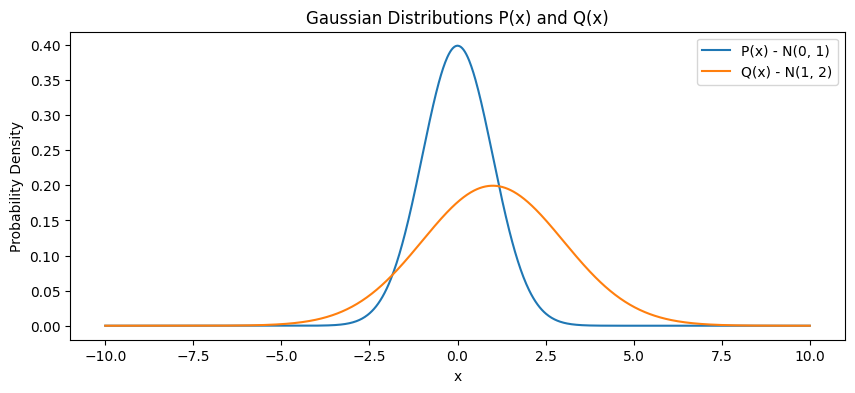

In [3]:
# Example 1: KL Divergence between two continuous Gaussian distributions
mu_p, sigma_p = 0, 1  # First Gaussian (P)
mu_q, sigma_q = 1, 2  # Second Gaussian (Q)

# Define PDFs
def p(x):
    return stats.norm.pdf(x, mu_p, sigma_p)

def q(x):
    return stats.norm.pdf(x, mu_q, sigma_q)

# Define KL divergence integrand
def kl_integrand(x):
    px = p(x)
    qx = q(x)
    return px * np.log(px / qx) if qx > 0 else 0

x_vals = np.linspace(-10, 10, 1000)

# Plot the two Gaussian distributions P(x) and Q(x)
p_vals = [p(x) for x in x_vals]
q_vals = [q(x) for x in x_vals]

plt.figure(figsize=(10, 4))
plt.plot(x_vals, p_vals, label='P(x) - N(0, 1)')
plt.plot(x_vals, q_vals, label='Q(x) - N(1, 2)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Distributions P(x) and Q(x)')
plt.legend()
plt.show()


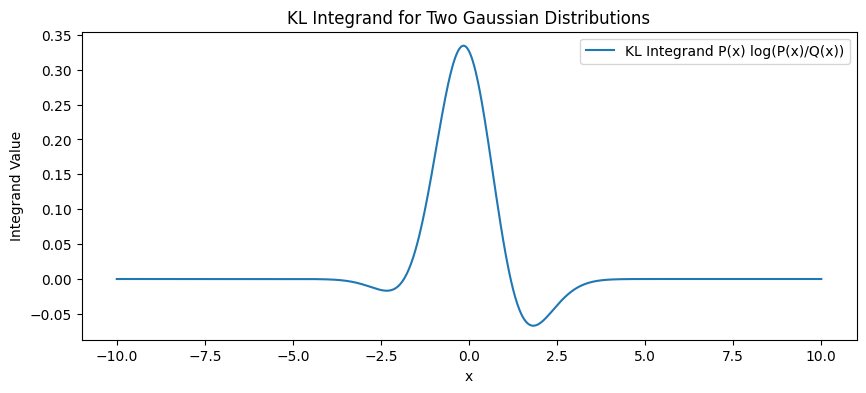

KL Divergence (Gaussian distributions): 0.4431


In [4]:
# Plot integrand
integrand_vals = [kl_integrand(x) for x in x_vals]

plt.figure(figsize=(10, 4))
plt.plot(x_vals, integrand_vals, label='KL Integrand P(x) log(P(x)/Q(x))')
plt.xlabel('x')
plt.ylabel('Integrand Value')
plt.title('KL Integrand for Two Gaussian Distributions')
plt.legend()
plt.show()


In [ ]:
# Compute KL divergence
kl_div, _ = quad(kl_integrand, -10, 10)

# Print KL divergence value
print(f"KL Divergence (Gaussian distributions): {kl_div:.4f}")

In [14]:
from ipywidgets import interact, FloatSlider

def update_plots(mean_p, std_p, mean_q, std_q):
    def p(x):
        return (1 / (std_p * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_p) / std_p) ** 2)

    def q(x):
        return (1 / (std_q * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_q) / std_q) ** 2)

    def kl_integrand(x):
        px = p(x)
        qx = q(x)
        return px * np.log(px / qx) if qx > 0 else 0

    x_vals = np.linspace(-10, 10, 1000)
    p_vals = [p(x) for x in x_vals]
    q_vals = [q(x) for x in x_vals]
    integrand_vals = [kl_integrand(x) for x in x_vals]

    plt.figure(figsize=(10, 4))
    plt.plot(x_vals, p_vals, label=f'P(x) - N({mean_p:.2f}, {std_p**2:.2f})')
    plt.plot(x_vals, q_vals, label=f'Q(x) - N({mean_q:.2f}, {std_q**2:.2f})')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.ylim(0, 0.5)
    plt.title('Gaussian Distributions P(x) and Q(x)')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(x_vals, integrand_vals, label='KL Integrand P(x) log(P(x)/Q(x))')
    plt.xlabel('x')
    plt.ylabel('Integrand Value')
    plt.ylim(-0.1, 0.4)
    plt.title('KL Integrand for Two Gaussian Distributions')
    plt.legend()
    plt.show()

interact(update_plots,
         mean_p=FloatSlider(value=0, min=-5, max=5, step=0.1, description='Mean P'),
         std_p=FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Std P'),
         mean_q=FloatSlider(value=1, min=-5, max=5, step=0.1, description='Mean Q'),
         std_q=FloatSlider(value=2, min=0.1, max=5, step=0.1, description='Std Q'))


interactive(children=(FloatSlider(value=0.0, description='Mean P', max=5.0, min=-5.0), FloatSlider(value=1.0, …

<function __main__.update_plots(mean_p, std_p, mean_q, std_q)>

## Example 2: KL Divergence between two discrete distributions

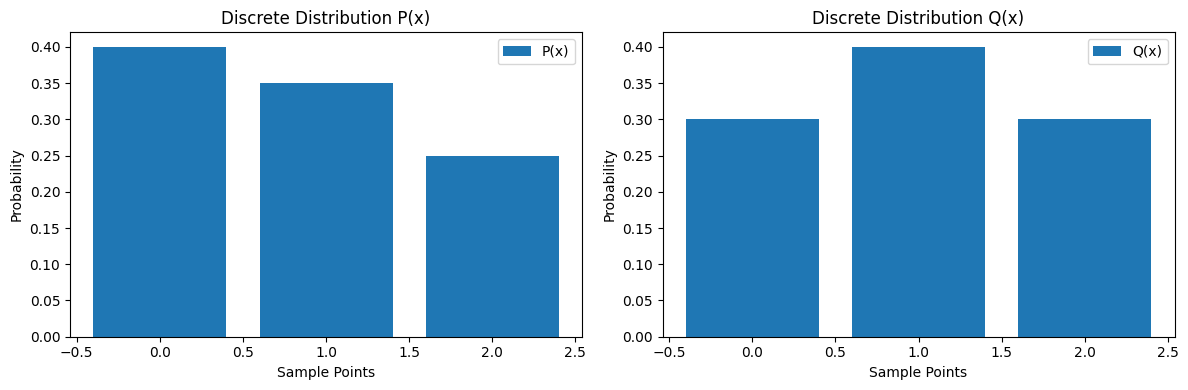

In [12]:

# Example 2: KL Divergence between two discrete distributions
p_discrete = np.array([0.4, 0.35, 0.25])  # Distribution P
q_discrete = np.array([0.3, 0.4, 0.3])   # Distribution Q

# Compute KL divergence for discrete case
kl_discrete = np.sum(p_discrete * np.log(p_discrete / q_discrete))

# Plot summand values
sample_points = np.arange(len(p_discrete))

# Plot the two discrete distributions P(x) and Q(x) in two bar graphs side by side

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot P(x)
ax1.bar(sample_points, p_discrete, label='P(x)')
ax1.set_xlabel('Sample Points')
ax1.set_ylabel('Probability')
ax1.set_title('Discrete Distribution P(x)')
ax1.legend()

# Plot Q(x)
ax2.bar(sample_points, q_discrete, label='Q(x)')
ax2.set_xlabel('Sample Points')
ax2.set_ylabel('Probability')
ax2.set_title('Discrete Distribution Q(x)')
ax2.legend()

plt.tight_layout()
plt.show()


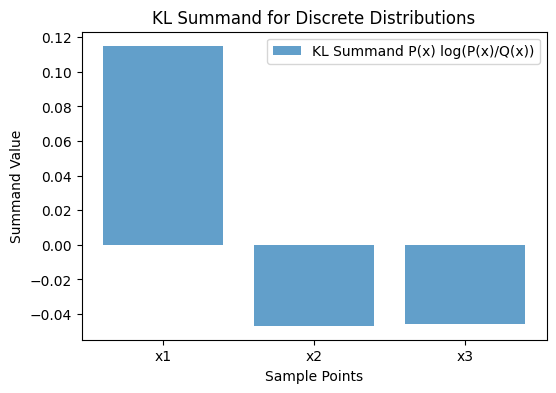

KL Divergence (Discrete distributions): 0.0228


In [13]:

summand_values = p_discrete * np.log(p_discrete / q_discrete)

plt.figure(figsize=(6, 4))
plt.bar(sample_points, summand_values, tick_label=["x1", "x2", "x3"], alpha=0.7, label='KL Summand P(x) log(P(x)/Q(x))')
plt.xlabel('Sample Points')
plt.ylabel('Summand Value')
plt.title('KL Summand for Discrete Distributions')
plt.legend()
plt.show()

# Print KL divergence value for discrete case
print(f"KL Divergence (Discrete distributions): {kl_discrete:.4f}")